In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt 

import os


%matplotlib inline

## Part 1 - Logistic Regression

In [2]:
# Read the data
FOLDER = 'data'
FILE = 'ex2data1.txt'
path = os.path.join(FOLDER, FILE)

data = pd.read_csv(path, header = None, names = ['exam1', 'exam2','y'])
data.head()

,exam1,exam2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### 1.1 Visualizing the data

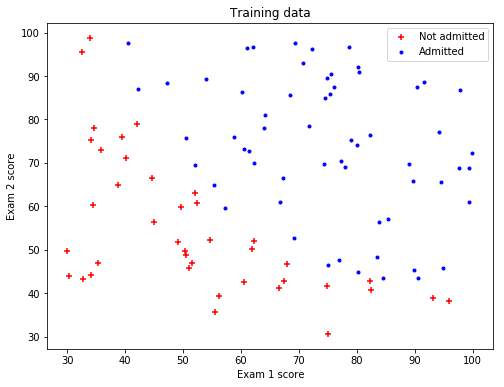

In [3]:
# Split the data to two variables
X = np.array(data[['exam1','exam2']])
Y = np.array(data['y'])

# Number of training examples
m = X.shape[0]


# Plot from different column objects
plt.figure(figsize = (8,6))
plt.scatter(X[Y == 0,0], X[Y == 0,1], marker = '+', c='red', label = 'Not admitted')
plt.scatter(X[Y == 1,0], X[Y == 1,1], marker = '.', c='blue', label = 'Admitted')

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Training data')
plt.legend()
plt.show()

### 1.2 Implementation

Logistic regression hypothesis is defined as: $$ h_{\theta}(x)=g(\theta^Tx), $$ where function $g$ is the sigmoid function. The sigmoid function is defined as: $$ g(z)=\frac{1}{1+e^{-z}} $$

#### 1.2.1 Warmup: sigmoid function

In [4]:
def sigmoid(z):
    '''
    Calculates the output of the sigmoid function
    '''
    res = 1 / (1 + np.exp(-z))
    return res

#### 1.2.2 Cost function and gradient

Cost function in logistic regression is 
$$ J(\theta)=\frac{1}{m} \sum_{i=1}^m \left [ -y^{(i)}log(h_{\theta}(x^{(i)})) - (1-y^{(i)})log(1-h_{\theta}(x^{(i)})) \right ] $$
and the gradient of the cost is a vecotr of the same length as $\theta$ where the $j^{th}$ element (for $j = 0,1,...,n$) is defined as:
$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)} $$

In [5]:
def costFunction(theta, x, y):
    '''
    Return the cost function for logistic regression
    '''
    #y_reshape = y.reshape(y.shape[0],1)
    assert theta.shape[0] == x.shape[1], " Theta first dimension and x second dimension mismatch"
    assert x.shape[0] == y.shape[0], " x first dimension and y first dimension mismatch"
    m = y.shape[0]
    prob = sigmoid(np.dot(x, theta))
    J = -y*np.log(prob) -(1-y)*np.log(1-prob)
    return J.mean()

def gradFunction(theta, x, y):
    '''
    Return the gradient for logistic regression
    '''
    #y_reshape = y.reshape(y.shape[0],1)
    assert theta.shape[0] == x.shape[1], " Theta first dimension and x second dimension mismatch"
    assert x.shape[0] == y.shape[0], " x first dimension and y first dimension mismatch"
    m = y.shape[0]
    grad = np.dot(x.T, sigmoid(np.dot(x, theta)) - y) / m
    return grad

In [6]:
# Initialize variables for experimenting
X_aug = np.hstack((np.ones((X.shape[0],1)), X))
init_theta = np.zeros(X_aug.shape[1])

# Compute initial cost and gradient
cost = costFunction(init_theta, X_aug, Y)
gradient = gradFunction(init_theta, X_aug, Y)

# Test score with initial values : expected value = 0.693
print("Cost: {0}".format(gradient))

Cost: [ -0.1        -12.00921659 -11.26284221]


In [7]:
test_theta = np.array([-24, 0.2, 0.2])

# Compute initial cost and gradient
cost1 = costFunction(test_theta, X_aug, Y)
gradient1 = gradFunction(test_theta, X_aug, Y)

# Test score with initial values : expected value = 0.693
print("Cost: {0}".format(cost1))
print("Gradient: {0}".format(gradient1))

Cost: 0.21833019382659796
Gradient: [0.04290299 2.56623412 2.64679737]


#### 1.2.3 Learning parameters using optimizer

In [8]:
# We will use the fmin_bfgs (Broyden-Fletcher-Goldfarb-Shanno algorithm) function from the Scipy Optimize package
theta_opt = opt.fmin_bfgs(costFunction, init_theta, fprime = gradFunction, args=(X_aug, Y))

cost_opt = costFunction(theta_opt, X_aug, Y)
print("Cost with optimal theta: {0}".format(cost_opt))
print("Optimal theta: {0}".format(theta_opt))

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 23
         Function evaluations: 31
         Gradient evaluations: 31
Cost with optimal theta: 0.20349770158944383
Optimal theta: [-25.16133284   0.2062317    0.2014716 ]


/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


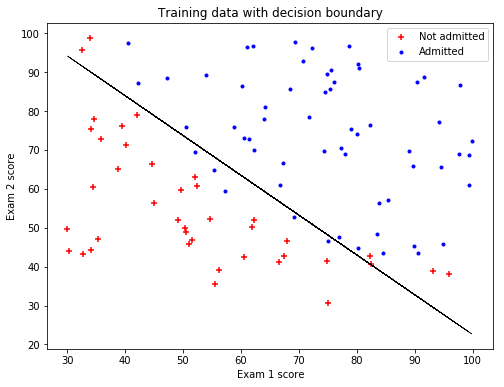

In [9]:
plt.figure(figsize = (8,6))
# Plot from different column objects
plt.scatter(X[Y == 0,0], X[Y == 0,1], marker = '+', c='red', label = 'Not admitted')
plt.scatter(X[Y == 1,0], X[Y == 1,1], marker = '.', c='blue', label = 'Admitted')

# Solving the equation analytically to find the appropriate X2
X1 = X_aug[:,1]
X2 = -(theta_opt[0] + theta_opt[1]*X1) / theta_opt[2]


plt.plot(X1, X2, linestyle='-', c = 'black', linewidth = 0.5)

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Training data with decision boundary')
plt.legend()
plt.show()

#### 1.2.4 Evaluating logistic regression

In [10]:
# Example with Exam1 score = 45 and Exam2 score = 85 (expected admission probability = 0.776)

test_stud = np.array([1,45,85])
print("Probability of admission = {0}".format(round(sigmoid(np.dot(test_stud, theta_opt)),4)))

Probability of admission = 0.7763


In [11]:
# Create the predict function

def predict(theta, x):
    predictions = np.where(sigmoid(np.dot(x, theta)) > 0.5, 1, 0).flatten()
    return predictions

In [12]:
# Calculate accuracy on training set

res = predict(theta_opt, X_aug)
acc = np.mean(res == Y)
print("Accuracy on training data: {0}%".format(round(acc*100,2)))

Accuracy on training data: 89.0%


## Part 2: Regularized logistic regression

In [13]:
# Read the data
FILE = 'ex2data2.txt'
path = os.path.join(FOLDER, FILE)

data = pd.read_csv(path, header = None, names = ['test1', 'test2','y'])
data.head()

,test1,test2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


### 2.1 Visualizing the data

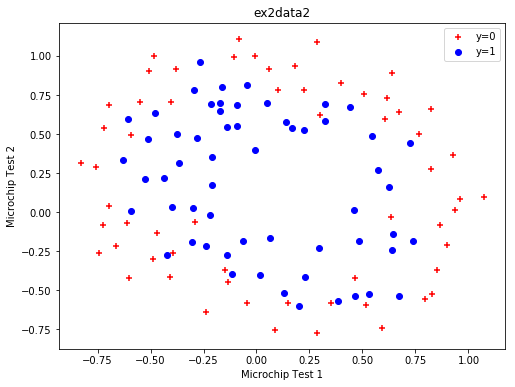

In [14]:
# Split the data to two variables
X = np.array(data[['test1','test2']])
Y = np.array(data['y'])

# Number of training examples
m = X.shape[0]

# Plot from different column objects
plt.figure(figsize = (8,6))
plt.scatter(X[Y == 0,0], X[Y == 0,1], marker = '+', c='red', label = 'y=0')
plt.scatter(X[Y == 1,0], X[Y == 1,1], marker = 'o', c='blue', label = 'y=1')
#plt.plot(X, Y, "x", label = 'Profit')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.title('ex2data2')
plt.legend()
plt.show()

### 2.2 Feature Mapping

In [15]:
def featureMap(x):
    # Add the bias term (x_0)
    x_res = np.hstack((np.ones((x.shape[0],1)), x))

    # Add the polynomials by hstacking
    for i in range(2,7):
        for j in range(i+1):
            x_res = np.concatenate((x_res, (np.power(x[:,0],i-j) * np.power(x[:,1],j)).reshape(x_res.shape[0],1)), axis = 1)
            
    return x_res

X_fm = featureMap(X)
X_fm.shape

(118, 28)

### 2.3 Cost function and Gradient

Recall that the regularized cost function in logistic regression is 
$$ J(\theta)=\frac{1}{m} \sum_{i=1}^m \left [ -y^{(i)}log(h_{\theta}(x^{(i)})) - (1-y^{(i)})log(1-h_{\theta}(x^{(i)})) \right ] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$
The gradient of the cost function is a vector where the $j^{th}$ element is defined as:
$$ 
\begin{align*}
&\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)} &\text{for }j=0 \\
&\frac{\partial J(\theta)}{\partial \theta_j} = \left ( \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)} \right ) + \frac{\lambda}{m}\theta_j &\text{for }j \geq 1 \\
\end{align*}
$$

In [16]:
def costFunctionReg(theta, x, y, l):
    '''
    Return the cost function for logistic regression
    '''
    #y_reshape = y.reshape(y.shape[0],1)
    assert theta.shape[0] == x.shape[1], " Theta first dimension and x second dimension mismatch"
    assert x.shape[0] == y.shape[0], " x first dimension and y first dimension mismatch"
    m = y.shape[0]
    prob = sigmoid(np.dot(x, theta))
    J = -y*np.log(prob) -(1-y)*np.log(1-prob)
    return J.mean() + l*np.sum(np.power(theta[1:],2))/(2*m)

def gradFunctionReg(theta, x, y, l):
    '''
    Return the gradient for logistic regression
    '''
    #y_reshape = y.reshape(y.shape[0],1)
    assert theta.shape[0] == x.shape[1], " Theta first dimension and x second dimension mismatch"
    assert x.shape[0] == y.shape[0], " x first dimension and y first dimension mismatch"
    m = y.shape[0]
    grad = np.dot(x.T, sigmoid(np.dot(x, theta)) - y) / m
    grad[1:] += l/m * theta[1:]
    return grad

In [17]:
init_theta = np.zeros(X_fm.shape[1])
print("Cost function regularized for initial theta = {0}".format(round(costFunctionReg(init_theta, X_fm, Y, 1),4)))
print("Gradient regularized for initial theta = {0}".format(gradFunctionReg(init_theta, X_fm, Y, 1)))

Cost function regularized for initial theta = 0.6931
Gradient regularized for initial theta = [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
 4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
 3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
 4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02]


#### 2.3.1 Learning parameters using fminunc

In [18]:
# lambda value
l = 1

# We will use the fmin_bfgs (Broyden-Fletcher-Goldfarb-Shanno algorithm) function from the Scipy Optimize package
theta_opt = opt.fmin_bfgs(costFunctionReg, init_theta, fprime = gradFunctionReg, args=(X_fm, Y, l))

cost_opt = round(costFunction(theta_opt, X_fm, Y),4)
print("Cost with optimal theta: {0}".format(cost_opt))
print("Optimal theta: {0}".format(theta_opt))

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48
Cost with optimal theta: 0.4625
Optimal theta: [ 1.27268739  0.62557016  1.1809665  -2.01919822 -0.91761468 -1.43194199
  0.12375921 -0.36513086 -0.35703388 -0.17485805 -1.45843772 -0.05129676
 -0.61603963 -0.2746414  -1.19282569 -0.24270336 -0.20570022 -0.04499768
 -0.27782709 -0.29525851 -0.45613294 -1.04377851  0.02762813 -0.29265642
  0.01543393 -0.32759318 -0.14389199 -0.92460119]


### 2.4 Plotting decision boundary

In [19]:
# num_of_partitions
part = 200

# First find the limits of the grid
test1_min, test1_max = X_fm[:, 1].min(), X_fm[:, 1].max()
test2_min, test2_max = X_fm[:, 2].min(), X_fm[:, 2].max()

# Create the meshgrid
test1_vals, test2_vals = np.meshgrid(np.linspace(test1_min, test1_max, part),
                     np.linspace(test2_min, test2_max, part))

def xmatrix(x1_array, x2_array, i_col):
    return np.concatenate((x1_array[:,i_col].reshape(x1_array.shape[0],1),
                           x2_array[:,i_col].reshape(x2_array.shape[0],1)),
                          axis = 1)

# Create result matrix
org_matrix = xmatrix(test1_vals, test2_vals, 0)
zz = sigmoid(np.dot(featureMap(org_matrix), theta_opt)).reshape(org_matrix.shape[0],1)
for i in range(1,test1_vals.shape[1]):
    featureMatrix = xmatrix(test1_vals, test2_vals, i)
    zz = np.concatenate((zz,
                         sigmoid(np.dot(featureMap(featureMatrix),
                                        theta_opt)).reshape(zz.shape[0],1)),
                        axis = 1)

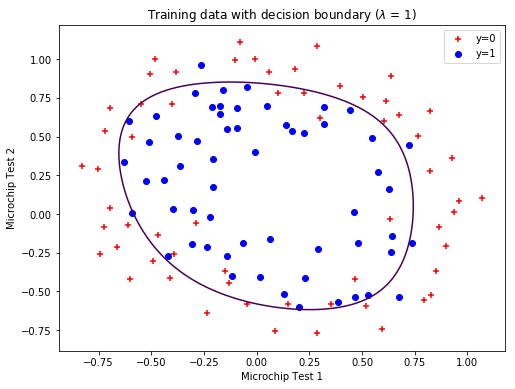

In [20]:
plt.figure(figsize= (8,6))
# Plot the decision boundary
cp = plt.contour(test1_vals, test2_vals, zz, [0.5])

# Plot from different column objects
plt.scatter(X[Y == 0,0], X[Y == 0,1], marker = '+', c='red', label = 'y=0')
plt.scatter(X[Y == 1,0], X[Y == 1,1], marker = 'o', c='blue', label = 'y=1')

plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.title('Training data with decision boundary ($\lambda$ = {0})'.format(l))
plt.legend()
plt.show()